## Hull-White model:

 - The Hull-White model is an interest rate model used to describe the evolution of interest rates over time. It assumes that the short rate follows a mean-reverting stochastic process.
- The model is defined by the following stochastic differential equation (SDE):
     
     $dr(t) = (\theta(t) - \alpha r(t)) dt + \sigma dW(t)$
     
     where $ \theta(t) $ is a time-dependent parameter, $ \alpha $ is the mean-reversion rate, $ \sigma $ is the volatility, and $ W(t) $ is a Wiener process.

### Simulating the Hull-White processes using Euler–Maruyama method

In [33]:
import numpy as np
import matplotlib.pyplot as plt

def hull_white_simulation(a, sigma, r0, T, dt, theta):
    N = int(T / dt)
    times = np.linspace(0, T, N + 1)
    rates = np.zeros(N + 1)
    rates[0] = r0
    
    for i in range(1, N + 1):
        t = times[i - 1]
        dr = (theta(t) - a * rates[i - 1]) * dt + sigma * np.sqrt(dt) * np.random.normal()
        rates[i] = rates[i - 1] + dr
    
    return times, rates    

In [34]:
a = 0.1
sigma = 0.1

a_array = np.array([i*0.02 for i in range(3,9)])  
sigma_array = np.array([i*0.006 for i in range(1,6)])

r0 = 0.03
T = 10.0     
dt = 0.01  

def theta(t):
    return 0.05

times_list = []
rates_list = []
for index in range(len(a_array)):
    times, rates = hull_white_simulation(a_array[index], sigma, r0, T, dt, theta)
    times_list.append(times)
    rates_list.append(rates)

for index in range(len(sigma_array)):
    times, rates = hull_white_simulation(a, sigma_array[index], r0, T, dt, theta)
    times_list.append(times)
    rates_list.append(rates)

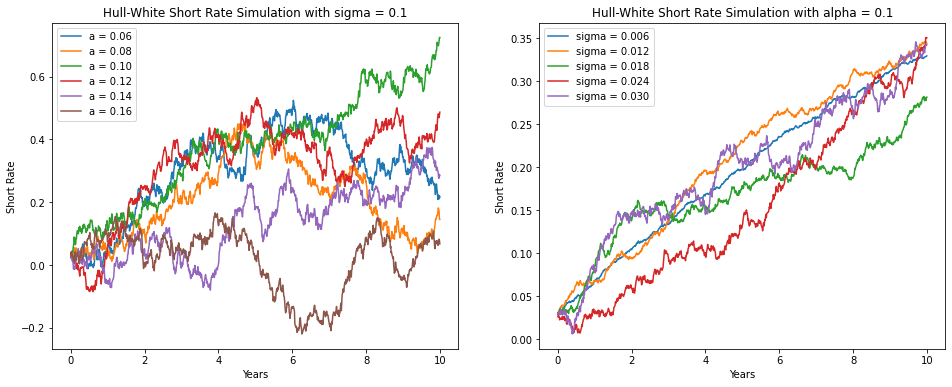

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# first graphs 
for i in range(len(a_array)):
    axs[0].plot(times_list[i], rates_list[i], label=f'a = {a_array[i]:.2f}')

axs[0].set_xlabel('Years')
axs[0].set_ylabel('Short Rate')
axs[0].set_title('Hull-White Short Rate Simulation with sigma = 0.1')
axs[0].legend()

# second graphs
for i in range(len(a_array), len(a_array) + len(sigma_array)):
    axs[1].plot(times_list[i], rates_list[i], label=f'sigma = {sigma_array[i - len(a_array)]:.3f}')

axs[1].set_xlabel('Years')
axs[1].set_ylabel('Short Rate')
axs[1].set_title('Hull-White Short Rate Simulation with alpha = 0.1')
axs[1].legend()
plt.show()